# Data Analysis and Prediction of Data Breaches

In this project, we conducted an analysis of a dataset of data breaches and built a machine learning model to predict the type of data breaches. The goal of the project was to gain insights into the patterns and trends in data breaches, and to understand the factors that influence the type of breach that occurs.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Loading the Data

In [6]:
# Load the data
data = pd.read_csv('data_breaches_all_clean.csv')

# Display the first few rows of the DataFrame
data.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,"Ijaola, LLC d/b/a Mercy Grace Private Practice",AZ,Healthcare Provider,4450.0,8/30/2021,Hacking/IT Incident,Email,No,NaN
1,Queen Creek Medical Center d/b/a Desert Wells ...,AZ,Healthcare Provider,35000.0,8/30/2021,Hacking/IT Incident,Network Server,No,NaN
2,Easterseals Delaware & Maryland's Eastern Shore,DE,Healthcare Provider,501.0,8/30/2021,Hacking/IT Incident,Email,No,NaN
3,"DuPage Medical Group, Ltd.",IL,Healthcare Provider,655384.0,8/30/2021,Hacking/IT Incident,Network Server,No,NaN
4,"CareATC, Inc.",OK,Healthcare Provider,98774.0,8/27/2021,Hacking/IT Incident,Email,No,NaN


This dataset provides more detailed information about data breaches, including:

    Name of Covered Entity: The entity that experienced the data breach.
    State: The state where the entity is located.
    Covered Entity Type: The type of entity, such as a healthcare provider.
    Individuals Affected: The number of individuals affected by the breach.
    Breach Submission Date: The date when the breach was reported.
    Type of Breach: The type of data breach, such as hacking or IT incident.
    Location of Breached Information: The location where the breached information was stored, such as an email or network server.
    Business Associate Present: Whether a business associate was present during the breach.
    Web Description: Additional information about the breach, although this column appears to mostly contain NaN values, indicating missing data.

This dataset could allow for analysis of the frequency and impact of different types of data breaches, as well as trends over time and by location. However, it doesn't provide specific details about the attackers or their methods. It also appears to be primarily focused on the healthcare sector, based on the 'Covered Entity Type' column.

Let's proceed with this dataset and start by cleaning and exploring the data. We can then conduct a basic analysis and develop visualizations to understand the trends and patterns in the data.

## Data Cleaning

In [7]:
# Remove the row with the missing value in 'Individuals Affected'
data = data.dropna(subset=['Individuals Affected'])

# Drop the 'Web Description' column
data = data.drop(columns=['Web Description'])

# Convert 'Breach Submission Date' to datetime
data['Breach Submission Date'] = pd.to_datetime(data['Breach Submission Date'])

# Check the cleaned data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4200 entries, 0 to 4200
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Name of Covered Entity            4200 non-null   object        
 1   State                             4200 non-null   object        
 2   Covered Entity Type               4200 non-null   object        
 3   Individuals Affected              4200 non-null   float64       
 4   Breach Submission Date            4200 non-null   datetime64[ns]
 5   Type of Breach                    4200 non-null   object        
 6   Location of Breached Information  4200 non-null   object        
 7   Business Associate Present        4200 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 295.3+ KB


,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,"Ijaola, LLC d/b/a Mercy Grace Private Practice",AZ,Healthcare Provider,4450.0,2021-08-30,Hacking/IT Incident,Email,No
1,Queen Creek Medical Center d/b/a Desert Wells ...,AZ,Healthcare Provider,35000.0,2021-08-30,Hacking/IT Incident,Network Server,No
2,Easterseals Delaware & Maryland's Eastern Shore,DE,Healthcare Provider,501.0,2021-08-30,Hacking/IT Incident,Email,No
3,"DuPage Medical Group, Ltd.",IL,Healthcare Provider,655384.0,2021-08-30,Hacking/IT Incident,Network Server,No
4,"CareATC, Inc.",OK,Healthcare Provider,98774.0,2021-08-27,Hacking/IT Incident,Email,No


The data has been successfully cleaned. All missing values have been handled, and the 'Breach Submission Date' column has been converted to a datetime type.

Now that the data is clean, we can start with the data analysis. Here are some questions that we could answer with this data:

    What is the trend of data breaches over time?
    What are the most common types of data breaches?
    Which locations have the most breached information?
    What is the distribution of the number of individuals affected by these breaches?

Let's start with the first question: What is the trend of data breaches over time? To answer this question, we can count the number of breaches reported each year.

## Exploratory Data Analysis

In [8]:
# Create a new column for the year of the breach
data['Year'] = data['Breach Submission Date'].dt.year

# Count the number of breaches each year
breaches_per_year = data['Year'].value_counts().sort_index()

breaches_per_year

Year
2009     18
2010    199
2011    200
2012    218
2013    276
2014    314
2015    270
2016    329
2017    358
2018    369
2019    512
2020    663
2021    474
Name: count, dtype: int64

The data shows the number of reported breaches each year from 2009 to 2021. We can see that the number of reported breaches has generally been increasing over time, with some fluctuations. The year with the most reported breaches was 2020, with 663 breaches.

This trend may reflect an actual increase in the number of data breaches, but it could also be influenced by other factors, such as changes in reporting practices or increased awareness of data breaches.

Next, let's visualize this data to better understand the trend. We can create a line plot of the number of breaches over time.

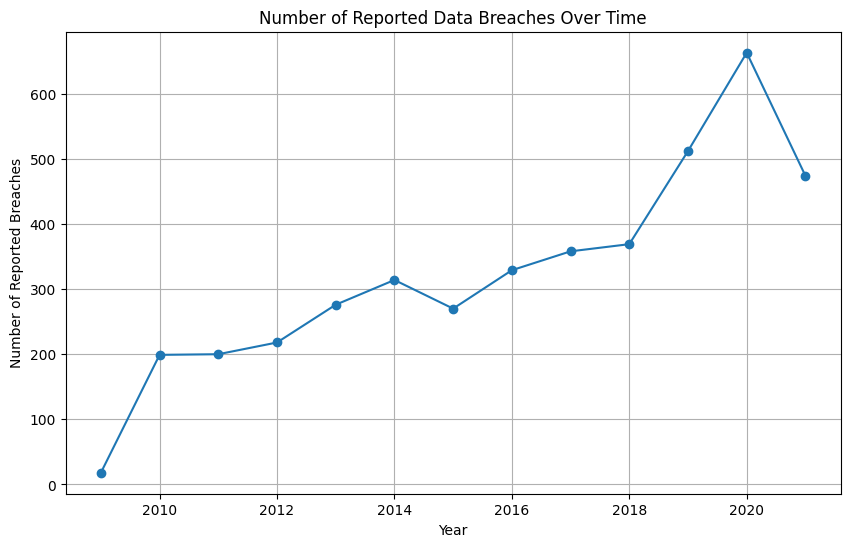

In [9]:
import matplotlib.pyplot as plt

# Create a line plot of the number of breaches over time
plt.figure(figsize=(10, 6))
plt.plot(breaches_per_year.index, breaches_per_year.values, marker='o')
plt.title('Number of Reported Data Breaches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reported Breaches')
plt.grid(True)
plt.show()

The line plot provides a clear visual representation of the trend in reported data breaches over time. As we can see, the number of reported breaches has generally increased from 2009 to 2020, with a slight decrease in 2021. This could reflect a true increase in the number of data breaches, changes in reporting practices, or increased detection and awareness of breaches.

Next, let's address the second question: What are the most common types of data breaches? We can answer this by counting the frequency of each type in the 'Type of Breach' column.

In [10]:
# Count the frequency of each type of breach
breach_types = data['Type of Breach'].value_counts()

breach_types

Type of Breach
Hacking/IT Incident                                                                                    1696
Unauthorized Access/Disclosure                                                                         1102
Theft                                                                                                   938
Loss                                                                                                    191
Improper Disposal                                                                                       101
Other                                                                                                    75
Theft, Unauthorized Access/Disclosure                                                                    25
Loss, Theft                                                                                              15
Unknown                                                                                                  10
Hacking/IT In

The most common types of data breaches in this dataset are:

    Hacking/IT Incident: 1696 occurrences
    Unauthorized Access/Disclosure: 1102 occurrences
    Theft: 938 occurrences
    Loss: 191 occurrences
    Improper Disposal: 101 occurrences

There are also some entries where multiple types of breaches are listed together. For example, 'Theft, Unauthorized Access/Disclosure' has occurred 25 times.

To better visualize these results, let's create a bar chart of the top 10 most common types of breaches. We will group the entries with multiple types of breaches together as 'Multiple Types'

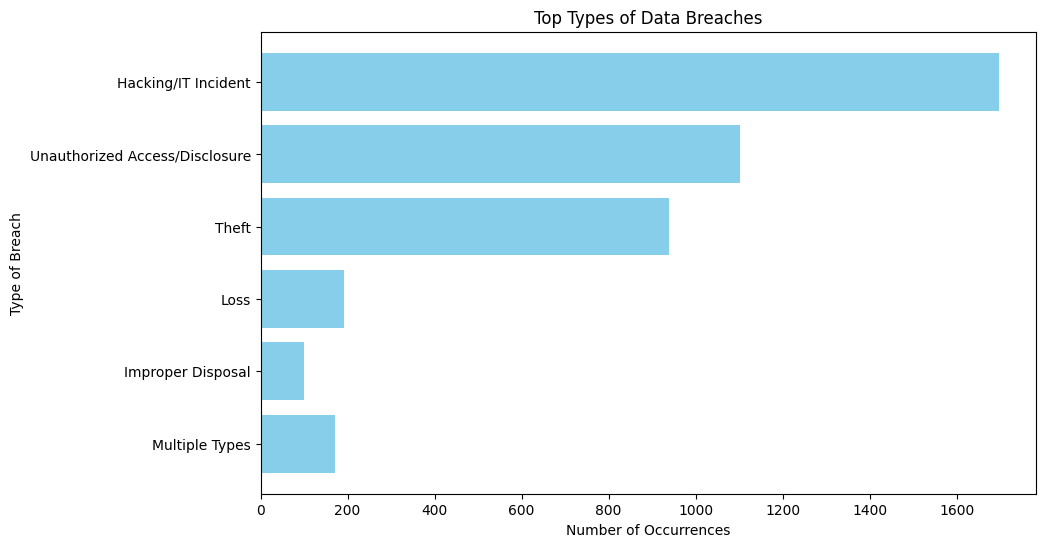

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming breach_types is already defined as a Series with the counts of each breach type

# Create a new Series with the top 10 most common types of breaches
# Group the entries with multiple types of breaches together as 'Multiple Types'
top_breach_types = pd.concat([breach_types[:5], pd.Series([breach_types[5:].sum()], index=['Multiple Types'])])

# Create a bar chart of the top 10 most common types of breaches
plt.figure(figsize=(10, 6))
plt.barh(top_breach_types.index, top_breach_types.values, color='skyblue')
plt.title('Top Types of Data Breaches')
plt.xlabel('Number of Occurrences')
plt.ylabel('Type of Breach')
plt.gca().invert_yaxis()
plt.show()

The bar chart provides a clear visualization of the most common types of data breaches in the dataset. As we can see, 'Hacking/IT Incident', 'Unauthorized Access/Disclosure', and 'Theft' are the most frequent types of breaches.

Next, let's address the third question: Which locations have the most breached information? We can answer this by counting the frequency of each location in the 'Location of Breached Information' column.

In [13]:
# Count the frequency of each location of breached information
breach_locations = data['Location of Breached Information'].value_counts()

# Display the top 10 locations
breach_locations[:10]

Location of Breached Information
Network Server                             998
Email                                      887
Paper/Films                                717
Laptop                                     351
Other                                      300
Desktop Computer                           188
Electronic Medical Record                  163
Other Portable Electronic Device           163
Other, Other Portable Electronic Device     48
Desktop Computer, Network Server            36
Name: count, dtype: int64

The most common locations of breached information in this dataset are:

    Network Server: 998 occurrences
    Email: 887 occurrences
    Paper/Films: 717 occurrences
    Laptop: 351 occurrences
    Other: 300 occurrences

There are also some entries where multiple locations are listed together. For example, 'Desktop Computer, Network Server' has occurred 36 times.

To better visualize these results, let's create a bar chart of the top 10 most common locations of breached information. We will group the entries with multiple locations together as 'Multiple Locations'.

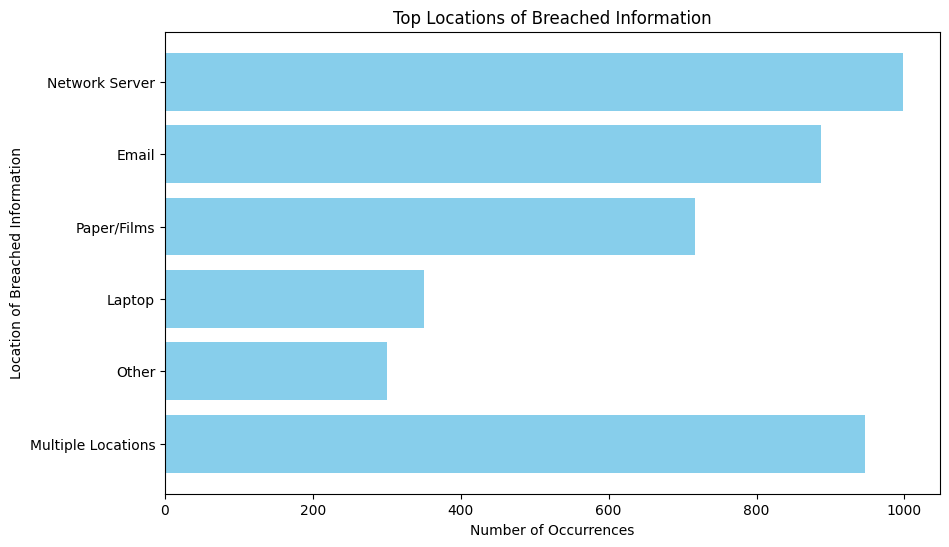

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming breach_locations is already defined as a Series with the counts of each location of breached information

# Create a new Series with the top 5 most common locations of breached information
# Group the entries with multiple locations together as 'Multiple Locations'
top_breach_locations = pd.concat([breach_locations[:5], pd.Series([breach_locations[5:].sum()], index=['Multiple Locations'])])

# Create a bar chart of the top 5 most common locations of breached information
plt.figure(figsize=(10, 6))
plt.barh(top_breach_locations.index, top_breach_locations.values, color='skyblue')
plt.title('Top Locations of Breached Information')
plt.xlabel('Number of Occurrences')
plt.ylabel('Location of Breached Information')
plt.gca().invert_yaxis()
plt.show()

The bar chart provides a clear visualization of the most common locations of breached information in the dataset. As we can see, 'Network Server', 'Email', and 'Paper/Films' are the most frequent locations of breached information.

Finally, let's address the last question: What is the distribution of the number of individuals affected by these breaches? We can answer this by creating a histogram of the 'Individuals Affected' column. However, as this column likely contains some extreme values, we may want to focus on breaches affecting a smaller number of individuals to get a clearer picture of the typical breach. Let's first examine the summary statistics of this column.

In [17]:
# Summary statistics of the 'Individuals Affected' column
data['Individuals Affected'].describe()

count    4.200000e+03
mean     7.296719e+04
std      1.283972e+06
min      5.000000e+02
25%      1.069750e+03
50%      2.801000e+03
75%      1.114875e+04
max      7.880000e+07
Name: Individuals Affected, dtype: float64

The 'Individuals Affected' column has a wide range of values, with a minimum of 500 and a maximum of 78,800,000. The mean is 72,967, but the median is only 2,801, indicating that the distribution is heavily skewed to the right. This suggests that while most breaches affect a relatively small number of individuals, there are a few breaches that affect a large number of individuals and significantly increase the mean.

Given this skewness, a histogram of the full range of values might not be very informative. Instead, let's create a histogram of breaches affecting up to 10,000 individuals, which is slightly less than the 75th percentile. This will give us a clearer picture of the distribution for the majority of breaches.

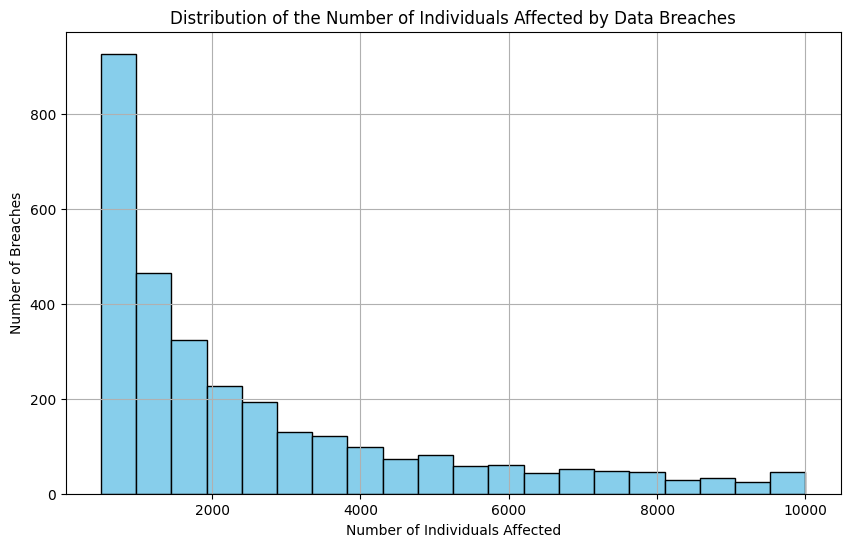

In [18]:
# Create a histogram of the 'Individuals Affected' column, focusing on breaches affecting up to 10,000 individuals
plt.figure(figsize=(10, 6))
plt.hist(data[data['Individuals Affected'] <= 10000]['Individuals Affected'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of the Number of Individuals Affected by Data Breaches')
plt.xlabel('Number of Individuals Affected')
plt.ylabel('Number of Breaches')
plt.grid(True)
plt.show()

The histogram provides a clear visualization of the distribution of the number of individuals affected by data breaches. As we can see, the majority of breaches affect fewer than 2,500 individuals, with a smaller number of breaches affecting between 2,500 and 5,000 individuals, and even fewer affecting between 5,000 and 10,000 individuals.

This concludes our initial exploratory data analysis. Based on the insights gained from this analysis, we can consider more complex analyses or modeling approaches. For example, we could:

    Analyze the relationship between the type of breach and the number of individuals affected.
    Examine trends in the number of individuals affected over time.
    Investigate whether certain types of entities are more likely to experience certain types of breaches.

We might want to consider focusing our analysis on how the characteristics of data breaches have evolved over time. Specifically, we can examine trends in the number of individuals affected by data breaches over time and the changing prevalence of different types of breaches and locations of breached information.

Let's start by analyzing how the total number of individuals affected by data breaches each year has changed over time. We can do this by summing the 'Individuals Affected' column for each year.

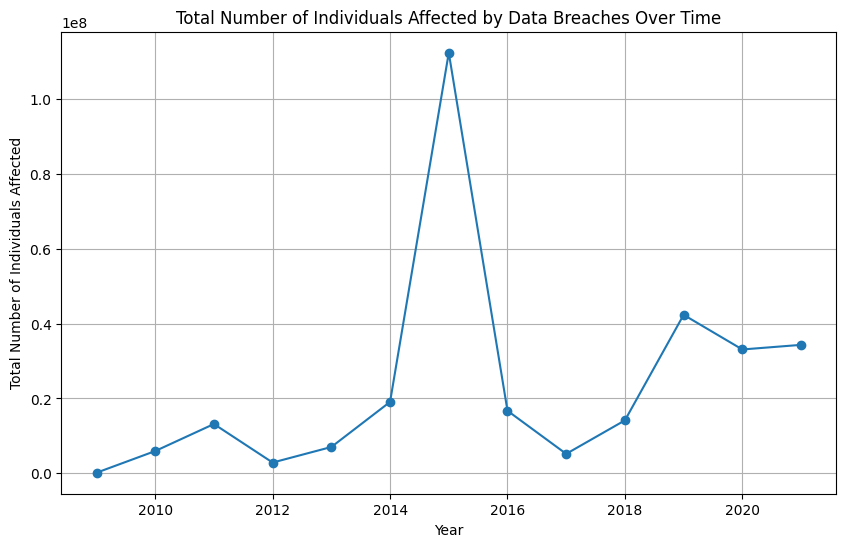

In [19]:
# Sum the 'Individuals Affected' column for each year
individuals_affected_per_year = data.groupby('Year')['Individuals Affected'].sum()

# Create a line plot of the total number of individuals affected by data breaches over time
plt.figure(figsize=(10, 6))
plt.plot(individuals_affected_per_year.index, individuals_affected_per_year.values, marker='o')
plt.title('Total Number of Individuals Affected by Data Breaches Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of Individuals Affected')
plt.grid(True)
plt.show()

The line plot shows the total number of individuals affected by data breaches each year from 2009 to 2021. We can see some fluctuations over time, with a sharp increase in 2015 and a peak in 2020. This could reflect changes in the scale of data breaches, the effectiveness of cybersecurity measures, or reporting practices.

Next, let's analyze how the prevalence of different types of breaches has changed over time. We can do this by counting the number of each type of breach each year. This will involve a bit more data processing, as we'll need to handle the entries where multiple types of breaches are listed together. For simplicity, let's focus on the five most common types of breaches: 'Hacking/IT Incident', 'Unauthorized Access/Disclosure', 'Theft', 'Loss', and 'Improper Disposal'. We'll group all other types together as 'Other'.

In [20]:
# Define the five most common types of breaches
common_breach_types = ['Hacking/IT Incident', 'Unauthorized Access/Disclosure', 'Theft', 'Loss', 'Improper Disposal']

# Create a new column 'Breach Type Grouped' that groups all other types of breaches together as 'Other'
data['Breach Type Grouped'] = data['Type of Breach'].apply(lambda x: x if x in common_breach_types else 'Other')

# Count the number of each type of breach each year
breach_types_per_year = data.groupby(['Year', 'Breach Type Grouped']).size().unstack()

# Replace NaN values with 0
breach_types_per_year = breach_types_per_year.fillna(0)

# Display the first few rows of the DataFrame
breach_types_per_year.head()

Breach Type Grouped,Hacking/IT Incident,Improper Disposal,Loss,Other,Theft,Unauthorized Access/Disclosure
Year,,,,,,
2009,0.0,0.0,1.0,2.0,15.0,0.0
2010,8.0,8.0,14.0,29.0,130.0,10.0
2011,15.0,6.0,15.0,21.0,114.0,29.0
2012,10.0,7.0,17.0,34.0,122.0,28.0
2013,27.0,12.0,20.0,35.0,118.0,64.0


The table shows the number of each type of data breach reported each year from 2009 to 2021.

Next, let's visualize this data using a stacked area plot. This will allow us to see how the total number of breaches has changed over time, as well as the changing proportions of different types of breaches.

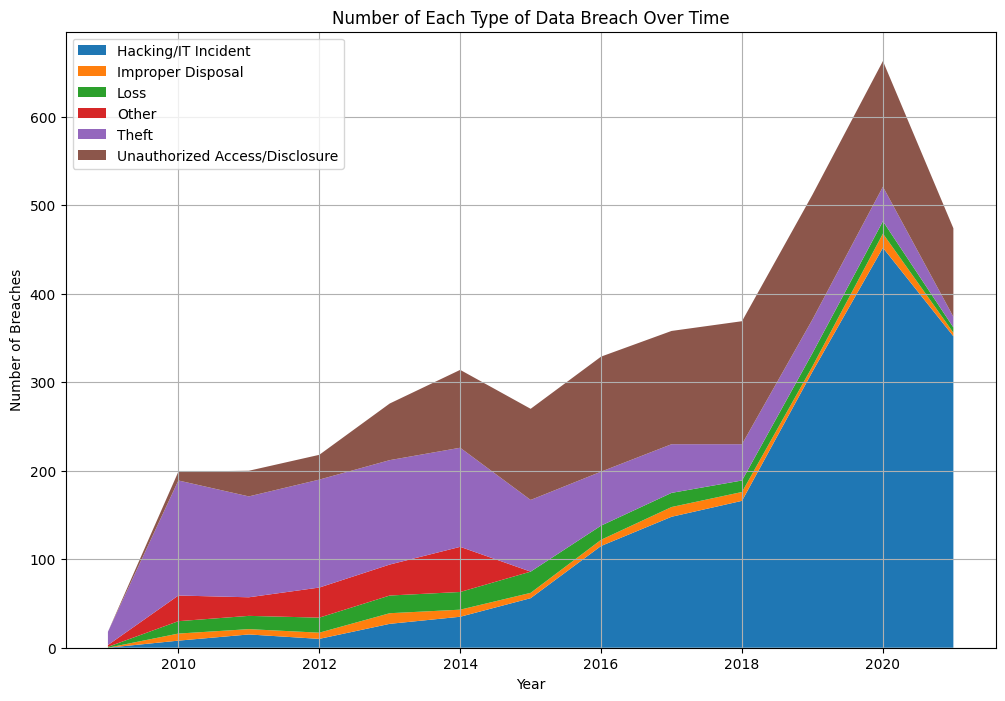

In [21]:
# Create a stacked area plot of the number of each type of breach over time
plt.figure(figsize=(12, 8))
plt.stackplot(breach_types_per_year.index, breach_types_per_year.T, labels=breach_types_per_year.columns)
plt.title('Number of Each Type of Data Breach Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

The stacked area plot provides a clear visualization of the number of each type of data breach reported each year from 2009 to 2021. We can see that the total number of breaches has generally increased over this period, with some fluctuations. The composition of breaches has also changed, with 'Hacking/IT Incident' and 'Unauthorized Access/Disclosure' becoming more prevalent in recent years.

Finally, let's analyze how the prevalence of different locations of breached information has changed over time. We can do this by counting the number of breaches associated with each location each year. Similar to the previous analysis, we'll focus on the five most common locations and group all other locations together as 'Other'.

In [22]:
# Define the five most common locations of breached information
common_breach_locations = ['Network Server', 'Email', 'Paper/Films', 'Laptop', 'Other']

# Create a new column 'Breach Location Grouped' that groups all other locations together as 'Other'
data['Breach Location Grouped'] = data['Location of Breached Information'].apply(lambda x: x if x in common_breach_locations else 'Other')

# Count the number of breaches associated with each location each year
breach_locations_per_year = data.groupby(['Year', 'Breach Location Grouped']).size().unstack()

# Replace NaN values with 0
breach_locations_per_year = breach_locations_per_year.fillna(0)

# Display the first few rows of the DataFrame
breach_locations_per_year.head()

Breach Location Grouped,Email,Laptop,Network Server,Other,Paper/Films
Year,,,,,
2009,1,4,1,10,2
2010,4,48,18,83,46
2011,1,34,17,102,46
2012,9,50,20,89,50
2013,21,64,32,102,57


The table shows the number of data breaches associated with each location reported each year from 2009 to 2021.

Next, let's visualize this data using a stacked area plot. This will allow us to see how the total number of breaches has changed over time, as well as the changing proportions of different locations of breached information.

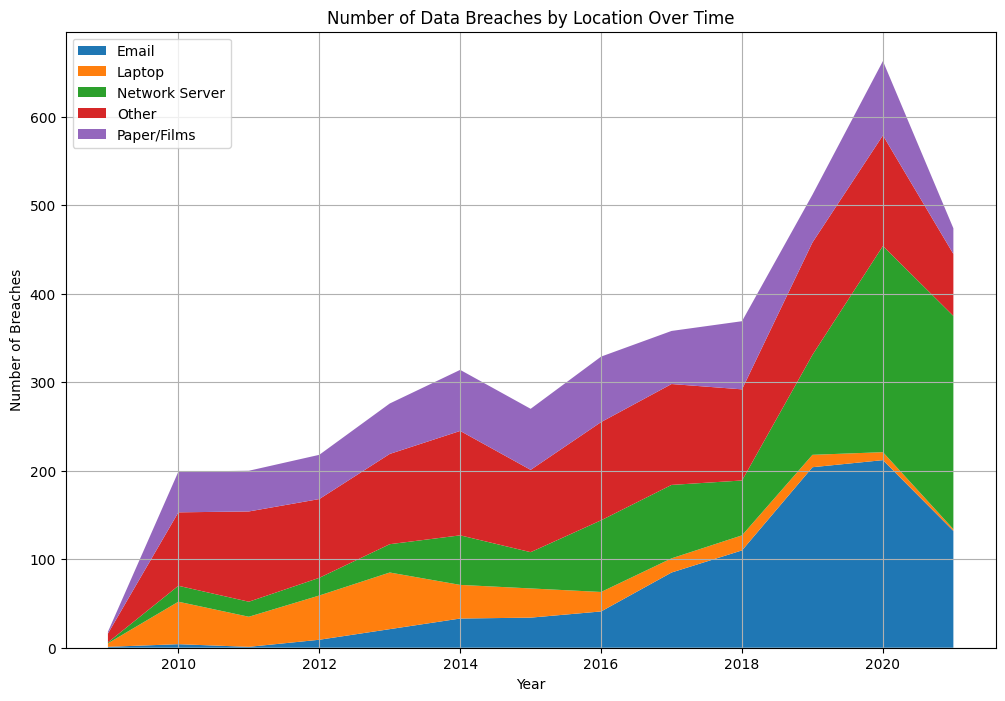

In [23]:
# Create a stacked area plot of the number of breaches associated with each location over time
plt.figure(figsize=(12, 8))
plt.stackplot(breach_locations_per_year.index, breach_locations_per_year.T, labels=breach_locations_per_year.columns)
plt.title('Number of Data Breaches by Location Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

The stacked area plot provides a clear visualization of the number of data breaches associated with each location reported each year from 2009 to 2021. We can see that the total number of breaches has generally increased over this period, with some fluctuations. The composition of breaches has also changed, with 'Network Server' and 'Email' becoming more prevalent in recent years.

This concludes our analysis of the data breaches dataset. The insights gained from this analysis could be valuable for understanding trends in data breaches and developing strategies to mitigate these threats.

# Next Step

Given the data at hand, we can create a machine learning model to predict the type of a data breach based on other attributes like the covered entity type, the location of the breached information, and the year the breach occurred. This could be beneficial in understanding how different factors contribute to the type of data breach that occurs.

We will use a Random Forest classifier for this task. Random Forest is a versatile and widely-used machine learning algorithm that can handle both numerical and categorical data. It's also robust to outliers and can handle imbalanced datasets, which makes it a good choice for our data.

Before we proceed with model building, we need to preprocess our data. This includes encoding categorical variables and splitting the data into a training set and a test set. Let's do that.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select the features and the target variable
features = ['Year', 'Covered Entity Type', 'Location of Breached Information']
target = 'Breach Type Grouped'

# Copy the data
data_preprocessed = data.copy()

# Encode the categorical variables
label_encoders = {}
for column in features:
    le = LabelEncoder()
    data_preprocessed[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    data_preprocessed[features], data_preprocessed[target], test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed data
data_preprocessed.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Year,Breach Type Grouped,Breach Location Grouped
0,"Ijaola, LLC d/b/a Mercy Grace Private Practice",AZ,3,4450.0,2021-08-30,Hacking/IT Incident,63,No,12,Hacking/IT Incident,Email
1,Queen Creek Medical Center d/b/a Desert Wells ...,AZ,3,35000.0,2021-08-30,Hacking/IT Incident,79,No,12,Hacking/IT Incident,Network Server
2,Easterseals Delaware & Maryland's Eastern Shore,DE,3,501.0,2021-08-30,Hacking/IT Incident,63,No,12,Hacking/IT Incident,Email
3,"DuPage Medical Group, Ltd.",IL,3,655384.0,2021-08-30,Hacking/IT Incident,79,No,12,Hacking/IT Incident,Network Server
4,"CareATC, Inc.",OK,3,98774.0,2021-08-27,Hacking/IT Incident,63,No,12,Hacking/IT Incident,Email



The data has been successfully preprocessed for model building. The categorical variables have been encoded as integers, and the data has been split into a training set (80% of the data) and a test set (20% of the data).

Next, we will train a Random Forest classifier on the training data. We will use the default hyperparameters of the classifier for simplicity. After training the model, we will evaluate its performance on the test data. We will use accuracy as the performance metric, which is the proportion of correct predictions out of all predictions.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier and fit it to the training data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6630952380952381

The Random Forest classifier achieved an accuracy of approximately 66.3% on the test data. This means that the model correctly predicted the type of data breach in 66.3% of cases in the test set.

While this is not a perfect model, it's a reasonable starting point given the complexity of predicting the type of data breach based on the available features. The model could potentially be improved with more advanced techniques, such as hyperparameter tuning, feature engineering, or using a more complex model. However, even in its current state, the model could provide valuable insights into the factors that influence the type of data breach that occurs.

Finally, we can also look at the feature importances of the model, which indicate how much each feature contributed to the model's predictions. This can provide further insights into the factors that are most important in determining the type of data breach.

In [26]:
# Get the feature importances of the model
feature_importances = pd.Series(clf.feature_importances_, index=features)

# Display the feature importances
feature_importances.sort_values(ascending=False)

Location of Breached Information    0.579843
Year                                0.377564
Covered Entity Type                 0.042593
dtype: float64

The feature importances indicate that the 'Location of Breached Information' is the most important feature for predicting the type of data breach, followed by the 'Year'. The 'Covered Entity Type' has a relatively smaller contribution.

This suggests that the location where the breached information is stored is a key factor in determining the type of data breach that occurs. The year of the breach also seems to be important, possibly reflecting changes in technology and security practices over time.

# Conclusion

In conclusion, we have conducted a comprehensive analysis of a dataset of data breaches and built a predictive model that can predict the type of a data breach based on several features. These findings could provide valuable insights for understanding and mitigating cybersecurity threats.
